In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

#SCFM15_Q1

The only working part of this device is between leads 17 and 13 (fridge wiring numbers). The dot should be 200nm and has one 500nm Ti/Al lead and one 400nm Co/Au lead. Those sizes may be a little off (leads wider, dot shorter) due to some serious overexposure in the ebeam lithography.

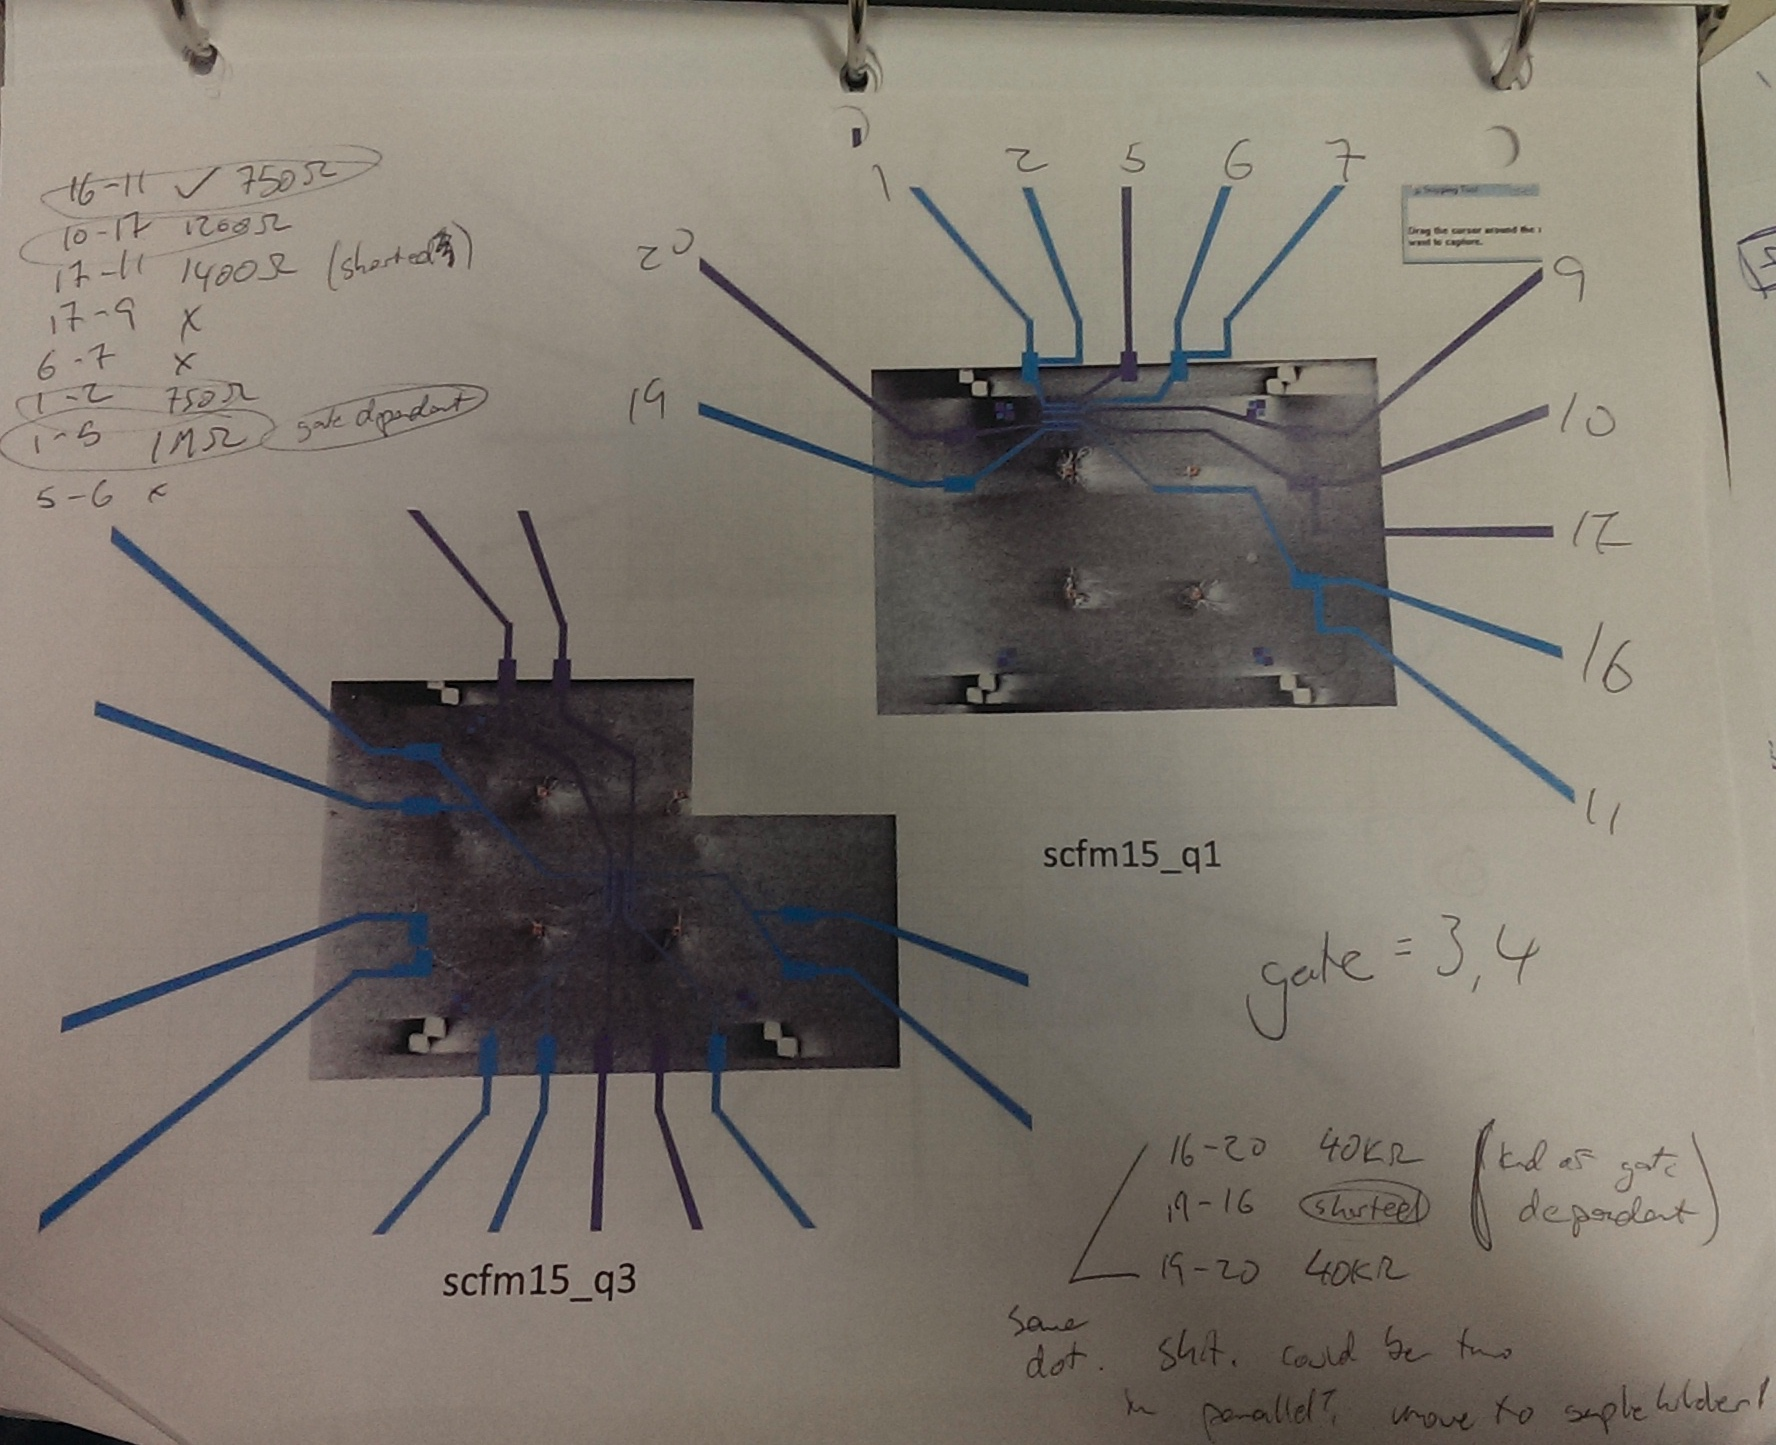

In [11]:
from IPython.display import display, Image

fig_dir = '/Volumes/EDDropbox/Data/scfm15_q1/figures/'
display(Image(os.path.join(fig_dir,'scfm15.jpg')))#, width=500, height=500))

All of my file names will refer to what leads were connected. The general naming scheme is something like...

*measurement_high_low-gate_number.filetype*

High, low, and gate refer to the pins where the high and low bias voltage and gate voltage are connected.

This sample was mounted in the Kelvinox 3 sample parallel field holder in the #3 spot (top).

## 4K DATA

In [12]:
data_dir = '/Volumes/EDDropbox/Data/scfm15_q1/4K/'

### Gate Dependence

The measured current as a funciton of gate voltage at fixed bias. This data was taken on leads 17-13.

In [17]:
f = os.path.join(data_dir,'gateswp-dc_17-13_9_f.bin')
df = lvdt.get_data_2d(f)

,Size,Gate,Iavg,Istd,t0,dt,i0,i1,i2,i3,...,i2990,i2991,i2992,i2993,i2994,i2995,i2996,i2997,i2998,i2999
0,3006,0.000,3.096070e-09,7.568706e-11,0.531683,0.000333,2.967132e-09,3.031634e-09,3.080010e-09,3.128385e-09,...,3.015508e-09,3.015508e-09,3.031634e-09,3.015508e-09,3.031634e-09,3.080010e-09,3.015508e-09,3.015508e-09,3.015508e-09,2.983258e-09
1,3006,0.025,3.086358e-09,8.706132e-11,1.797308,0.000333,3.209012e-09,3.176761e-09,3.241263e-09,3.225137e-09,...,3.096135e-09,3.096135e-09,3.112260e-09,3.031634e-09,3.128385e-09,3.080010e-09,3.096135e-09,3.063884e-09,2.967132e-09,3.080010e-09
2,3006,0.050,3.100505e-09,7.581567e-11,3.047308,0.000333,3.096135e-09,3.257388e-09,3.370265e-09,3.338014e-09,...,3.144511e-09,3.015508e-09,2.983258e-09,3.047759e-09,3.112260e-09,3.096135e-09,3.080010e-09,3.128385e-09,3.128385e-09,3.160636e-09
3,3006,0.075,3.042212e-09,7.718273e-11,4.312933,0.000333,3.015508e-09,3.338014e-09,3.402516e-09,3.321889e-09,...,3.031634e-09,3.031634e-09,3.015508e-09,3.015508e-09,3.047759e-09,2.951007e-09,3.047759e-09,3.047759e-09,3.080010e-09,2.951007e-09
4,3006,0.100,3.048818e-09,7.466294e-11,5.562933,0.000333,2.886506e-09,3.128385e-09,3.241263e-09,3.160636e-09,...,3.096135e-09,3.192887e-09,3.241263e-09,3.225137e-09,3.047759e-09,3.080010e-09,3.031634e-09,3.015508e-09,2.999383e-09,2.999383e-09


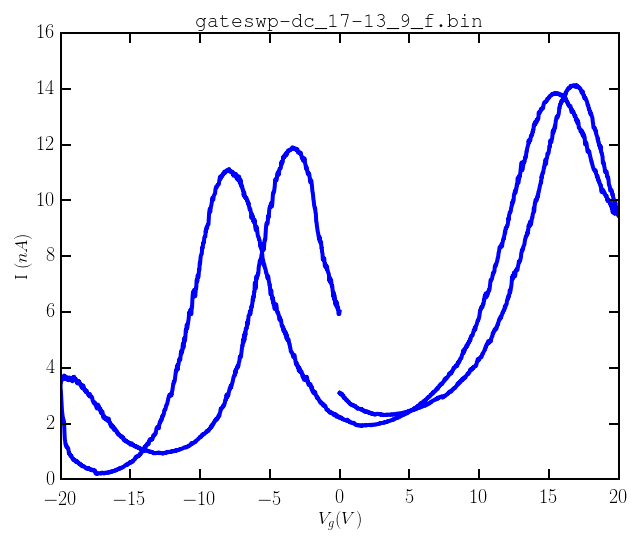

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'I $(nA)$')

Ignoring the shift in the up/down sweeps, this is still pretty strange. The peak spacing is about 200x what I would expect for a dot of this size. That means either I'm not supplying the right gate voltage (that is not true) or the coupling to the gate is very poor.

### Diamonds?

The measured current as a funciton of gate voltage and bias voltage. This data was taken on leads 17-13.

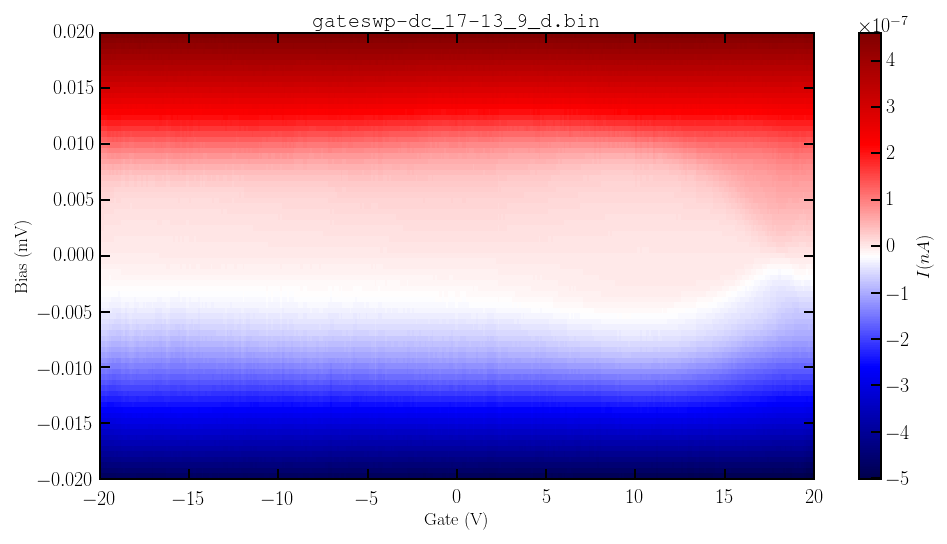

In [20]:
f = os.path.join(data_dir,'gateswp-dc_17-13_9_d.bin')
df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
limits = lvdt.df_extent(df)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(df, extent = limits, 
               cmap = plt.cm.seismic, #vmin = -0.6, vmax = 1.0, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('Gate (V)')
ax.set_ylabel('Bias (mV)') 
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

Again, some peaks appear to have shifted, but it's the same idea. The spacing in the bias sweep is about what I would have expected for a dot this size.

Probably the same problem I saw on pretty much every sample after this. Or it is a simple gate leak. A gate leak can act like a voltage divider here and show this type behavior.